# EE499 Final Project
# Premier League Predictor
Hojeong Lee and Nate Chism

In [1]:
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from autograd import grad 
from autograd import hessian
import math
import copy
import pandas as pd
import sys
import time
from IPython.display import clear_output
readDataPath = './readData/'
sys.path.append('./')

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn import svm 
from sklearn import metrics

In [2]:
season_data = pd.read_csv('./readData/df_full_premierleague.csv')
season_csv_to_array = np.array(season_data)
# print(range(0, len(house_csv_to_array) -1))
print(season_csv_to_array.shape)
print(season_csv_to_array)

(4070, 114)
[[0 'https://www.premierleague.com/match/7186' '10/11' ... 0.78 -4.0 55.6]
 [1 'https://www.premierleague.com/match/7404' '10/11' ... 0.32 17.0 60.2]
 [2 'https://www.premierleague.com/match/7255' '10/11' ... 0.38 9.0 66.7]
 ...
 [4067 'https://www.premierleague.com/match/59178' '20/21' ... 0.69 4.0
  64.1]
 [4068 'https://www.premierleague.com/match/59182' '20/21' ... 0.42 6.0
  54.2]
 [4069 'https://www.premierleague.com/match/59052' '20/21' ... 0.87 5.0
  71.1]]


In [3]:
# 2, 4, 5, 6, 8 - 31, 38 - 49, 56  
print(season_csv_to_array[5][100])

nan


In [4]:
i, j = season_csv_to_array.shape
print(i)
print(j)
match_target_scores = np.zeros((i,3))
# match_teams = np.array((i, 3))
for it_1 in range(0, i):
    # store game unique id
    match_target_scores[it_1][0] = season_csv_to_array[it_1][0]
    #store game unique id, home team, away team
    # match_teams[it_1][0] = season_csv_to_array[it_1][0]
    # match_teams[it_1][1] = season_csv_to_array[it_1][4]
    # match_teams[it_1][2] = season_csv_to_array[it_1][5]
    if season_csv_to_array[it_1][34] > 0:
        match_target_scores[it_1][1] = 1
    elif season_csv_to_array[it_1][34] < 0:
        match_target_scores[it_1][1] = -1
    else:
        match_target_scores[it_1][1] = 0

print(match_target_scores[678])

4070
114
[678.  -1.   0.]


In [5]:
season_data_cleaned = np.zeros((i, 102))

# print(season_csv_to_array[5])
season_csv_to_array[pd.isnull(season_csv_to_array)] = 0
# print(season_csv_to_array[5])
# 2, 4, 5, 6, 8 - 31, 38 - 49, 56  
for it in range(0, i):
    ct = 0
    for it2 in range(0, j):
        
        # if(np.isnan(season_csv_to_array[it][it2])):
        #     print(season_csv_to_array[it][it2])

        if it2 not in [1, 2, 3, 4, 5, 6, 7, 32, 33, 34, 35, 36, 37]:
            season_data_cleaned[it][ct] = season_csv_to_array[it][it2]
            # print(ct)
            ct = ct + 1

        elif it2 == 2:
            season_number = (int)(season_csv_to_array[it][it2][0] + season_csv_to_array[it][it2][1])
            season_data_cleaned[it][ct] = season_number
            ct = ct + 1

        
        

# print(season_data_cleaned)
print(season_data_cleaned[5])


[  5.   10.   15.    5.    9.    4.  609.   65.6   0.   19.    4.   23.
 820.    2.   32.    3.    7.    0.  313.   34.4   0.    9.    4.   21.
 527.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0. ]


In [6]:
print("it: ", it, " ct: ", ct, " it2: ", it2)

it:  4069  ct:  102  it2:  113


In [7]:
print(season_data_cleaned[4000][1])

20.0


In [8]:
season_data_cleaned[123][0]

123.0

In [9]:
seasons_train = np.zeros((3419, 102))
season_18 = np.zeros((380, 102))
season_19 = np.zeros((380, 102))

Y_train = np.zeros((3419,))
Y_test1 = np.zeros((380,))
Y_test2 = np.zeros((380,))

ct1 = 0
ct2 = 0
ct3 = 0
for it in range(0, i):
    target_index = season_data_cleaned[it][0]
    if season_data_cleaned[it][1] not in [18, 19]:
        seasons_train[ct1] = season_data_cleaned[it]
        Y_train[ct1] = match_target_scores[it][1]
        ct1 = ct1 + 1
    elif season_data_cleaned[it][1] == 18:
        # print(it)
        season_18[ct2] = season_data_cleaned[it]
        Y_test1[ct2] = match_target_scores[it][1]
        ct2 = ct2 + 1
        # print(it)
    elif season_data_cleaned[it][1] == 19:
        season_19[ct3] = season_data_cleaned[it]
        Y_test2[ct3] = match_target_scores[it][1]
        ct3 = ct3 + 1
        # print(it)
    else:
        print('THIS SHOULD NEVER HAPPEN')

# Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

print(seasons_train.shape)
print(season_18.shape)
print(season_19.shape)

norm = MinMaxScaler(feature_range=(0,2)).fit(seasons_train)
seasons_train_normalized = norm.transform(seasons_train)
season_18_normalized = norm.transform(season_18)
season_19_normalized = norm.transform(season_19)


# seasons_train_normalized = preprocessing.normalize(X=seasons_train, norm='max')
# season_18_normalized = preprocessing.normalize(X=season_18, norm='max')
# season_19_normalized = preprocessing.normalize(X=season_19, norm='max')

scaler = StandardScaler().fit(seasons_train)
seasons_train_scaled = scaler.transform(seasons_train)
season_18_scaled = scaler.transform(season_18)
season_19_scaled = scaler.transform(season_19)

(3419, 102)
(380, 102)
(380, 102)


In [11]:
# ideas: 
    # normalize based on different probabilities
        #USE X*w0, X*w1, X*w2 for the 3 probabilities
    # train on 3 batches of 800
    # create a validation set to use for comparing models

In [12]:
# X_train = seasons_train
# X_test1 = season_18
# X_test2 = season_19

# X_train = seasons_train_normalized
# X_test1 = season_18_normalized
# X_test2 = season_19_normalized

X_train = seasons_train_scaled
X_test1 = season_18_scaled
X_test2= season_19_scaled

In [13]:
#BEST SO FAR
log_reg_clf = LogisticRegression(penalty = 'l2', multi_class='ovr', random_state = 0, max_iter=1000, solver = 'newton-cg').fit(X_train, Y_train)

print('Logistic Regression (Newton)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton)
Score train:  0.689090377303305
Score test 1:  0.7078947368421052
Score test 2:  0.6368421052631579


In [68]:
#model 1: Perceptron

perc_clf = Perceptron(alpha= .0001, tol=1e-3, random_state=859)
perc_clf.fit(X_train, Y_train)
Perceptron()

print('Score: ', perc_clf.score(X_train, Y_train))
print('Score test 1: ', perc_clf.score(X_test1, Y_test1))
print('Score test 2: ', perc_clf.score(X_test2, Y_test2))

Score:  0.6221117285756069
Score test 1:  0.6052631578947368
Score test 2:  0.5736842105263158


In [707]:
# perc_clf.score(X_train, Y_train)

Max score:  0.6563322608949985


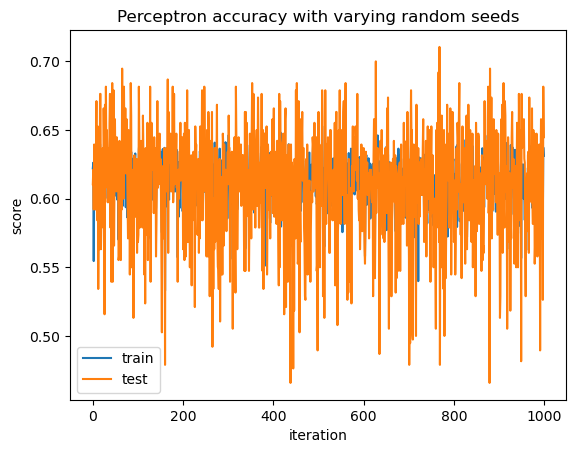

In [98]:
score_hist = []
test_hist = []
for it in range(0, 1000):
    perc_clf = Perceptron(alpha= .0001, tol=1e-3, random_state=it)
    perc_clf.fit(X_train, Y_train)
    Perceptron()
    score_hist.append(perc_clf.score(X_train, Y_train))
    test_hist.append(perc_clf.score(X_test1, Y_test1))
                      
print('Max score: ', max(score_hist))
plt.plot(range(0, len(score_hist)), score_hist, label = 'train')
plt.plot(range(0, len(test_hist)), test_hist, label='test')
plt.title('Perceptron accuracy with varying random seeds')
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

In [709]:
# max_value_seed = max(score_hist)
# max_index_seed = score_hist.index(max_value_seed)
# print(max_index_seed)

In [710]:
# alpha_values = []
# val = 0.0001
# for i in range(0, 10000):
#     alpha_values.append(val)
#     val = val + 0.0001

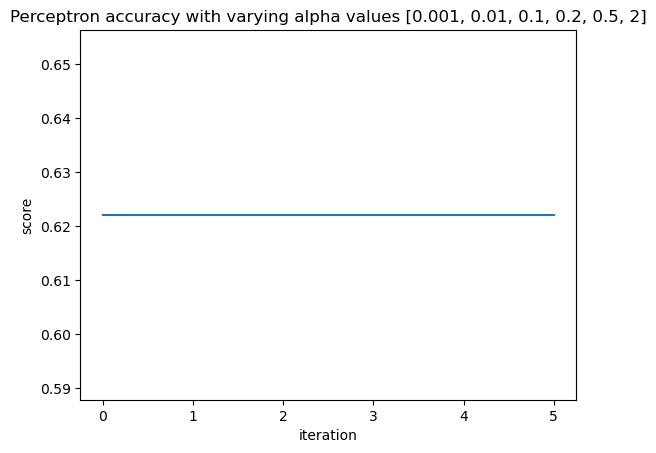

In [76]:
score_hist = []
for it in [0.001, 0.01, 0.1, 0.2, 0.5, 2]:
    perc_clf = Perceptron(alpha= it, tol=1e-3, random_state=859)
    perc_clf.fit(X_train, Y_train)
    Perceptron()
    score_hist.append(perc_clf.score(X_train, Y_train))
             
# print('Max score: ', max(score_hist))
# max_value_alpha = max(score_hist)
# max_index_alpha = score_hist.index(max_value_alpha)
# print(max_index_alpha)

plt.plot(range(0, len(score_hist)), score_hist)
plt.title('Perceptron accuracy with varying alpha values [0.001, 0.01, 0.1, 0.2, 0.5, 2]')
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

In [712]:
# print('Max score: ', max(score_hist))
# max_value_alpha = max(score_hist)
# max_index_alpha = score_hist.index(max_value_alpha)
# print(max_index_alpha)

Perceptron

In [15]:
perc_clf = Perceptron(alpha= .0001, tol=1e-3, random_state=859)
perc_clf.fit(X_train, Y_train)
Perceptron()

print('Perceptron')
print('Score train: ', perc_clf.score(X_train, Y_train))
print('Score test 1: ', perc_clf.score(X_test1, Y_test1))
print('Score test 2: ', perc_clf.score(X_test2, Y_test2))

Perceptron
Score train:  0.6221117285756069
Score test 1:  0.6052631578947368
Score test 2:  0.5736842105263158


In [16]:
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'liblinear').fit(X_train, Y_train)

print('Logistic Regression (liblinear)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (liblinear)
Score train:  0.688797894121088
Score test 1:  0.7078947368421052
Score test 2:  0.6368421052631579


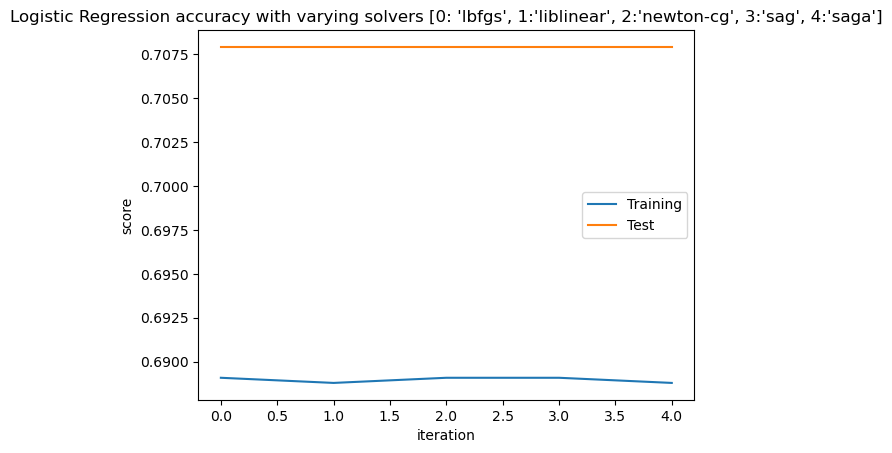

In [84]:
score_hist = []
test_hist = []
test2_hist = []
for solver_it in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=1000, solver = solver_it).fit(X_train, Y_train)

    score_hist.append(log_reg_clf.score(X_train, Y_train))
    test_hist.append(log_reg_clf.score(X_test1, Y_test1))
    # test2_hist.append(log_reg_clf.score(X_test2, Y_test2))

plt.plot(range(0, len(score_hist)), score_hist, label = 'Training')
plt.plot(range(0, len(test_hist)), test_hist, label='Test')
# plt.plot(range(0, len(test2_hist)), test2_hist, label='test2')
plt.title('Logistic Regression accuracy with varying solvers [0: \'lbfgs\', 1:\'liblinear\', 2:\'newton-cg\', 3:\'sag\', 4:\'saga\']')
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()
# print('Max score: ', max(score_hist))
# max_value_seed = max(score_hist)
# max_index_seed = score_hist.index(max_value_seed)
# print('Best random_state = ', max_index_seed)

In [716]:
# print('Max score: ', max(score_hist))
# max_value_seed = max(score_hist)
# max_index_seed = score_hist.index(max_value_seed)
# print('Best random_state = ', max_index_seed)
# print(len(score_hist))

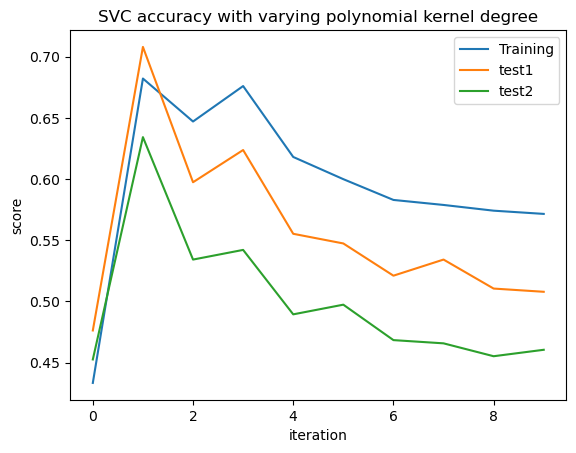

In [91]:
score_hist = []
test_hist = []
test2_hist = []
for deg in range(0, 10):
    svm_clf = svm.SVC(gamma='scale', degree=deg, random_state=0, kernel='poly').fit(X_train, Y_train)

    score_hist.append(svm_clf.score(X_train, Y_train))
    test_hist.append(svm_clf.score(X_test1, Y_test1))
    test2_hist.append(svm_clf.score(X_test2, Y_test2))

plt.plot(range(0, len(score_hist)), score_hist, label = 'Training')
plt.plot(range(0, len(test_hist)), test_hist, label='test1')
plt.plot(range(0, len(test2_hist)), test2_hist, label='test2')
plt.title('SVC accuracy with varying polynomial kernel degree')
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()
# print('Max score: ', max(score_hist))
# max_value_seed = max(score_hist)
# max_index_seed = score_hist.index(max_value_seed)
# print('Best random_state = ', max_index_seed)

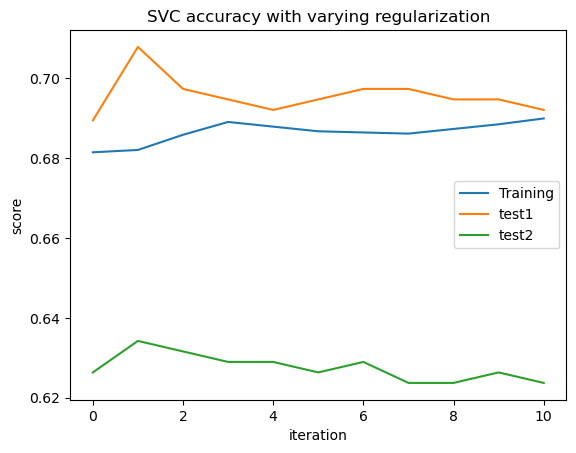

In [89]:
score_hist = []
test_hist = []
test2_hist = []
for c in [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]:
    svm_clf = svm.SVC(C=c, gamma='scale', degree=1, random_state=0, kernel='poly').fit(X_train, Y_train)

    score_hist.append(svm_clf.score(X_train, Y_train))
    test_hist.append(svm_clf.score(X_test1, Y_test1))
    test2_hist.append(svm_clf.score(X_test2, Y_test2))

plt.plot(range(0, len(score_hist)), score_hist, label = 'Training')
plt.plot(range(0, len(test_hist)), test_hist, label='test1')
plt.plot(range(0, len(test2_hist)), test2_hist, label='test2')
plt.title('SVC accuracy with varying regularization')
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

linear
poly
rbf
sigmoid


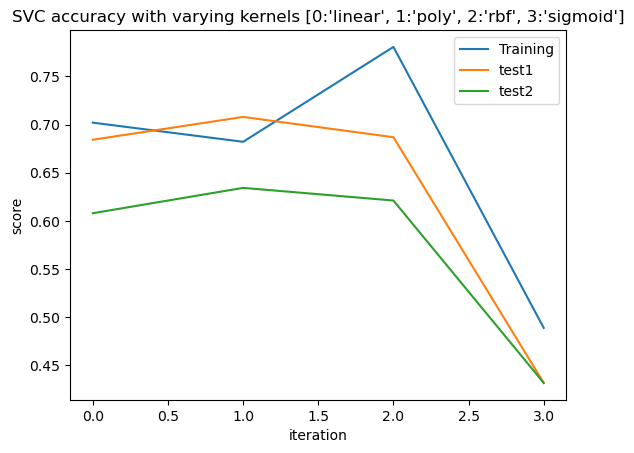

In [93]:
score_hist = []
test_hist = []
test2_hist = []
for kern in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(kern)
    svm_clf = svm.SVC(gamma='scale', degree=1, random_state=0, kernel=kern).fit(X_train, Y_train)

    score_hist.append(svm_clf.score(X_train, Y_train))
    test_hist.append(svm_clf.score(X_test1, Y_test1))
    test2_hist.append(svm_clf.score(X_test2, Y_test2))

plt.plot(range(0, len(score_hist)), score_hist, label = 'Training')
plt.plot(range(0, len(test_hist)), test_hist, label='test1')
plt.plot(range(0, len(test2_hist)), test2_hist, label='test2')
plt.title('SVC accuracy with varying kernels [0:\'linear\', 1:\'poly\', 2:\'rbf\', 3:\'sigmoid\']')
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

In [95]:
score_hist = []
test_hist = []
test2_hist = []
for seed in range(0, 1000):
    # print(kern)
    svm_clf = svm.SVC(gamma='scale', degree=1, random_state=seed, kernel='poly').fit(X_train, Y_train)

    score_hist.append(svm_clf.score(X_train, Y_train))
    test_hist.append(svm_clf.score(X_test1, Y_test1))
    test2_hist.append(svm_clf.score(X_test2, Y_test2))

plt.plot(range(0, len(score_hist)), score_hist, label = 'Training')
plt.plot(range(0, len(test_hist)), test_hist, label='test1')
plt.plot(range(0, len(test2_hist)), test2_hist, label='test2')
plt.title('SVC accuracy with varying random seed')
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

KeyboardInterrupt: 

# Start Here

In [17]:
#BEST SO FAR
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'newton-cg').fit(X_train, Y_train)

print('Logistic Regression (Newton)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton)
Score train:  0.689090377303305
Score test 1:  0.7078947368421052
Score test 2:  0.6368421052631579


In [18]:
print('classes: ', log_reg_clf.classes_)
temp_ind = np.random.randint(0, 380)
print(X_test1[0].shape)
print(log_reg_clf.coef_[0].shape)
print('1: ', X_test1[temp_ind].T@log_reg_clf.coef_[0])
print('2: ', X_test1[temp_ind].T@log_reg_clf.coef_[1])
print('3: ', X_test1[temp_ind].T@log_reg_clf.coef_[2])
print('predict probabilities: ', log_reg_clf.predict_proba(X_test1)[temp_ind])
predictions1 = log_reg_clf.predict(X_test1)
predictions2 = log_reg_clf.predict(X_test2)
thresh0 = log_reg_clf.predict_proba(X_test1)[temp_ind][0]
thresh1 = log_reg_clf.predict_proba(X_test1)[temp_ind][1]
thresh2 = log_reg_clf.predict_proba(X_test1)[temp_ind][2]
print('threshold 1: ' + str(thresh0) + ', threshold 2: ' + str(thresh0+thresh1) + ', threshold 3: ' + str(1))


classes:  [-1.  0.  1.]
(102,)
(102,)
1:  0.9237552409982444
2:  0.7369118756842226
3:  -1.4579730058548963
predict probabilities:  [0.37253738 0.49479202 0.1326706 ]
threshold 1: 0.3725373834369773, threshold 2: 0.8673294001532021, threshold 3: 1


In [19]:
print('Accuracy Score for season 1: ', metrics.accuracy_score(predictions1, Y_test1))
print('Balanced Accuracy Score for season 1: ', metrics.balanced_accuracy_score(predictions1, Y_test1))
print('Accuracy Score for season 2: ', metrics.accuracy_score(predictions2, Y_test2))
print('Balanced Accuracy Score for season 2: ', metrics.balanced_accuracy_score(predictions2, Y_test2))

Accuracy Score for season 1:  0.7078947368421052
Balanced Accuracy Score for season 1:  0.6170526610067243
Accuracy Score for season 2:  0.6368421052631579
Balanced Accuracy Score for season 2:  0.5920112220515447


In [20]:
prob1 = log_reg_clf.predict_proba(X_test1)
temp0 = prob1[0][0]
temp1 = prob1[0][1]
temp2 = prob1[0][2]
print('==========')

rand_num = np.random.random()

print(temp0)
print(temp1)
print(temp2)

thresh0 = temp0
thresh1 = temp0+temp1
thresh2 = temp0 + temp1 + temp2
print('==========')
print(thresh0, ',', thresh1, ',', thresh2)
print('==========')
if rand_num < thresh0:
    print(rand_num)
    print('-1')
elif thresh0 < rand_num < thresh1:
    print(rand_num)
    print('0')
else:
    print(rand_num)
    print('+1')



0.06842198698775184
0.07984503280875169
0.8517329802034965
0.06842198698775184 , 0.14826701979650353 , 1.0
0.2598930333413946
+1


In [21]:
prob1 = log_reg_clf.predict_proba(X_test1)
prob2 = log_reg_clf.predict_proba(X_test2)

max_pred1 = np.zeros(len(X_test1))
random_pred1 = np.zeros(len(X_test1))
max_pred2 = np.zeros(len(X_test2))
random_pred2 = np.zeros(len(X_test2))

for it in range(0, len(X_test1)):
    max_pred1[it] = np.exp(predictions2[it]) / np.sum(np.exp(predictions2[it]))#np.max(predictions1[it])
    temp0 = prob1[it][0]
    temp1 = prob1[it][1]
    temp2 = prob1[it][2]
    pick = np.random.random()

    thresh0 = temp0
    thresh1 = temp0+temp1
    thresh2 = temp0 + temp1 + temp2
    # print('==========')
    # print(thresh0, ',', thresh1, ',', thresh2)
    # print('==========')
    if pick < thresh0:
        # print(rand_num)
        # print('-1')
        random_pred1[it] = -1
    elif thresh0 < pick < thresh1:
        # print(rand_num)
        # print('0')
        random_pred1[it] = 0
    else:
        # print(rand_num)
        # print('+1')
        random_pred1[it] = 1

for it in range(0, len(X_test2)):
    max_pred2[it] = np.exp(predictions2[it]) / np.sum(np.exp(predictions2[it]))#np.max(predictions2[it])
    temp0 = prob2[it][0]
    temp1 = prob2[it][1]
    temp2 = prob2[it][2]
    pick = np.random.random()

    thresh0 = temp0
    thresh1 = temp0+temp1
    thresh2 = temp0 + temp1 + temp2
    # print('==========')
    # print(thresh0, ',', thresh1, ',', thresh2)
    # print('==========')
    if pick < thresh0:
        # print(rand_num)
        # print('-1')
        random_pred2[it] = -1
    elif thresh0 < pick < thresh1:
        # print(rand_num)
        # print('0')
        random_pred2[it] = 0
    else:
        # print(rand_num)
        # print('+1')
        random_pred2[it] = 1

model_pred1 = log_reg_clf.predict(X_test1)
model_pred2 = log_reg_clf.predict(X_test2)

In [23]:
print('Model Accuracy Score for season 1:  ', metrics.accuracy_score(model_pred1, Y_test1))
print('Softmax Accuracy Score for season 1:    ', metrics.accuracy_score(max_pred1, Y_test1))
print('Random Accuracy Score for season 1: ', metrics.accuracy_score(random_pred1, Y_test1))
print('\n')
print('Model Accuracy Score for season 2:  ', metrics.accuracy_score(model_pred2, Y_test2))
print('Softmax Accuracy Score for season 2:    ', metrics.accuracy_score(max_pred2, Y_test2))
print('Random Accuracy Score for season 2: ', metrics.accuracy_score(random_pred2, Y_test2))


Model Accuracy Score for season 1:   0.7078947368421052
Softmax Accuracy Score for season 1:     0.4763157894736842
Random Accuracy Score for season 1:  0.5368421052631579


Model Accuracy Score for season 2:   0.6368421052631579
Softmax Accuracy Score for season 2:     0.45263157894736844
Random Accuracy Score for season 2:  0.5184210526315789


In [27]:
# even size classes
count = 0
count1 = 0
count2 = 0
big_ct = 0
X_train_trunc = np.zeros((2400, 102))
Y_train_trunc = np.zeros(2400)


for it in range(len(Y_train)):
    index = it#np.random.randint(0, 3419)
    if Y_train[it] == -1:
        # if count < 800:
        #     X_train_trunc[big_ct] = X_train[index]
        #     Y_train_trunc[big_ct] = Y_train[index]
        #     big_ct = big_ct + 1
        count = count + 1
    if Y_train[it] == 0:
        # if count1 < 800:
        #     X_train_trunc[big_ct] = X_train[index]
        #     Y_train_trunc[big_ct] = Y_train[index]
        #     big_ct = big_ct + 1
        count1 = count1 + 1
    if Y_train[it] == 1:
        # if count2 < 800:
        #     X_train_trunc[big_ct] = X_train[index]
        #     Y_train_trunc[big_ct] = Y_train[index]
        #     big_ct = big_ct + 1
        count2 = count2 + 1

print('==========')
print('Class -1 size: ' + str(count) + ' %: ' + str(count/ (count + count1 + count2)))
print('Class 0 size: ' + str(count1) + ' %: ' +str(count1/ (count + count1 + count2)))
print('Class +1 size: ' + str(count2) + ' %: ' +str(count2/ (count + count1 + count2)))
print('Total set size: ' + str(count + count1 + count2))
print(len(Y_train))

count = 0
count1 = 0
count2 = 0

for it in range(len(Y_train_trunc)):
    if Y_train_trunc[it] == -1:
        # if count < 800:
        #     X_train_trunc[big_ct] = X_train[it]
        #     Y_train_trunc[big_ct] = Y_train[it]
        #     big_ct = big_ct + 1
        count = count + 1
    if Y_train_trunc[it] == 0:
        # if count1 < 800:
        #     X_train_trunc[big_ct] = X_train[it]
        #     Y_train_trunc[big_ct] = Y_train[it]
        #     big_ct = big_ct + 1
        count1 = count1 + 1
    if Y_train_trunc[it] == 1:
        # if count2 < 800:
        #     X_train_trunc[big_ct] = X_train[it]
        #     Y_train_trunc[big_ct] = Y_train[it]
        #     big_ct = big_ct + 1
        count2 = count2 + 1

print('==========')
print('Class -1 size: ', count)
print('Class 0 size: ', count1)
print('Class 1 size: ', count2)
print('Total set size: ' + str(count + count1 + count2))
print(len(Y_train_trunc))

Class -1 size: 991 %: 0.2898508335770693
Class 0 size: 946 %: 0.2766890903773033
Class +1 size: 1482 %: 0.43346007604562736
Total set size: 3419
3419
Class -1 size:  0
Class 0 size:  2400
Class 1 size:  0
Total set size: 2400
2400


In [768]:
# even size classses
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'newton-cg').fit(X_train_trunc, Y_train_trunc)

print('Logistic Regression (Newton) with even class training sizes')
print('Score train: ', log_reg_clf.score(X_train_trunc, Y_train_trunc))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton) with even class training sizes
Score train:  0.6958333333333333
Score test 1:  0.37105263157894736
Score test 2:  0.37894736842105264


the rankings

In [797]:
#BEST SO FAR
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'newton-cg').fit(X_train, Y_train)

print('Logistic Regression (Newton)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton)
Score train:  0.689090377303305
Score test 1:  0.7078947368421052
Score test 2:  0.6368421052631579


In [726]:
y_pred1 = log_reg_clf.predict(X_test1)
y_pred2 = log_reg_clf.predict(X_test2)

In [727]:
# retrieve and sort coefficients
# coefficients = abs(log_reg_clf.coef_)
# sorted_coefficients = sorted(enumerate(coefficients), key=lambda x: x[1], reverse=True)

# # print the most influential parameters
# for i, coef in sorted_coefficients[:3]:
#     print(f"Parameter {i}: {coef}")

In [799]:
svm_clf = svm.SVC(gamma='scale', degree=2, random_state=0, kernel='linear').fit(X_train, Y_train)

print('SVM SVC')
# print('degree = ', deg)
print('Score train: ', svm_clf.score(X_train, Y_train))
print('Score test 1: ', svm_clf.score(X_test1, Y_test1))
print('Score test 2: ', svm_clf.score(X_test2, Y_test2))

SVM SVC
Score train:  0.7019596373208541
Score test 1:  0.6842105263157895
Score test 2:  0.6078947368421053


In [729]:
# y_pred1 = svm_clf.predict(X_test1)
# y_pred2 = svm_clf.predict(X_test2)

# 2018-2019

In [730]:
standing18 = {}
indexofteams = []
for i in range(len(season_csv_to_array)):
    season_number = (int)(season_csv_to_array[i][2][0] + season_csv_to_array[i][2][1])
    # print(season_number)
    if season_number == 18:
        indexofteams.append(i)
        if (season_csv_to_array[i][4]) in standing18:
            standing18[season_csv_to_array[i][4]] = 0
            # print(season_csv_to_array[i][4])
        else:
            standing18[season_csv_to_array[i][4]] = 0

In [731]:
it = 1
for key in standing18:
    # print(it)
    print(key)
    it = it + 1

Manchester United
Leicester City
Wolverhampton Wanderers
Cardiff City
West Ham United
Liverpool
Everton
Southampton
Brighton and Hove Albion
Arsenal
AFC Bournemouth
Manchester City
Watford
Crystal Palace
Chelsea
Burnley
Tottenham Hotspur
Huddersfield Town
Newcastle United
Fulham


In [732]:
i= 3039
for ind in range(len(y_pred1)):
    if y_pred1[ind] == 1:
        standing18[season_csv_to_array[i][4]] += 3
    elif y_pred1[ind] == 0:
        standing18[season_csv_to_array[i][4]] += 1
        standing18[season_csv_to_array[i][5]] += 1
    else:
        standing18[season_csv_to_array[i][5]] += 3
    i=i+1

In [733]:
sorted_dict18 = dict(sorted(standing18.items(), key=lambda x: x[1], reverse=True))
print(sorted_dict18)
ct = 0
print('2018-2019 Premier League Predicted Standings')
for it in sorted_dict18:
    print(ct, '\t', it, ':', sorted_dict18[it])
    ct = ct+1

{'Manchester City': 105, 'Liverpool': 98, 'Chelsea': 78, 'Manchester United': 71, 'Wolverhampton Wanderers': 66, 'Tottenham Hotspur': 65, 'AFC Bournemouth': 59, 'Everton': 58, 'Leicester City': 57, 'Southampton': 57, 'Arsenal': 56, 'Watford': 53, 'Crystal Palace': 49, 'West Ham United': 44, 'Newcastle United': 42, 'Brighton and Hove Albion': 37, 'Burnley': 35, 'Cardiff City': 30, 'Fulham': 28, 'Huddersfield Town': 14}
2018-2019 Premier League Predicted Standings
0 	 Manchester City : 105
1 	 Liverpool : 98
2 	 Chelsea : 78
3 	 Manchester United : 71
4 	 Wolverhampton Wanderers : 66
5 	 Tottenham Hotspur : 65
6 	 AFC Bournemouth : 59
7 	 Everton : 58
8 	 Leicester City : 57
9 	 Southampton : 57
10 	 Arsenal : 56
11 	 Watford : 53
12 	 Crystal Palace : 49
13 	 West Ham United : 44
14 	 Newcastle United : 42
15 	 Brighton and Hove Albion : 37
16 	 Burnley : 35
17 	 Cardiff City : 30
18 	 Fulham : 28
19 	 Huddersfield Town : 14


In [734]:
actual_values_18 = {
            'Manchester City' : (1, 98),
            'Liverpool' : (2, 97),
            'Chelsea' : (3, 72),
            'Tottenham Hotspur' : (4, 71),
            'Arsenal' : (5, 70),
            'Manchester United' : (6, 66),
            'Wolverhampton Wanderers' : (7, 57),
            'Everton' : (8, 54),
            'Leicester City' : (9, 52),
            'West Ham United' : (10, 52),
            'Watford' : (11, 50),
            'Crystal Palace' : (12, 49),
            'Newcastle United' : (13, 45),
            'AFC Bournemouth' : (14, 45),
            'Burnley' : (15, 40),
            'Southampton' : (16, 39),
            'Brighton and Hove Albion' : (17, 36),
            'Cardiff City' : (18, 34),
            'Fulham' : (19, 26),
            'Huddersfield Town': (20, 16)
}

In [735]:
max_len_key = max(len(k) for k in sorted_dict18.keys())  # get the maximum length of keys
max_len_value = max(len(str(v)) for v in sorted_dict18.values())  # get the maximum length of values
place = 1

print('2018-2019 Premier League Season')
# print('Logistic Regression, OVR, Newton-CG')
print('')
print('# \t Team \t\t\t\t Points (pred)\tPoints (real)\tPoints Diff\tPlace Diff')
print('__________________________________________________________________________________________________')
for key, value in sorted_dict18.items():
    if place < 10:
        print(place, ' :\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_18[key][1], value - actual_values_18[key][1], actual_values_18[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    else:
        print(place, ':\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_18[key][1], value - actual_values_18[key][1], actual_values_18[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    place = place + 1

2018-2019 Premier League Season

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester City           	 105 		  98		   7		   0
2  :	 Liverpool                 	  98 		  97		   1		   0
3  :	 Chelsea                   	  78 		  72		   6		   0
4  :	 Manchester United         	  71 		  66		   5		   2
5  :	 Wolverhampton Wanderers   	  66 		  57		   9		   2
6  :	 Tottenham Hotspur         	  65 		  71		  -6		  -2
7  :	 AFC Bournemouth           	  59 		  45		  14		   7
8  :	 Everton                   	  58 		  54		   4		   0
9  :	 Leicester City            	  57 		  52		   5		   0
10 :	 Southampton               	  57 		  39		  18		   6
11 :	 Arsenal                   	  56 		  70		 -14		  -6
12 :	 Watford                   	  53 		  50		   3		  -1
13 :	 Crystal Palace            	  49 		  49		   0		  -1
14 :	 West Ham United           	  44 		  52		  -8		  -4
15 :	

In [736]:
champions_leage_pred = []
champions_league_real = ['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham Hotspur']
relegation_pred = []
relegation_real = ['Cardiff City', 'Fulham', 'Huddersfield Town']

place = 1
for key, value in sorted_dict18.items():
    if place < 5:
        champions_leage_pred.append(key)
    if place > 17:
        relegation_pred.append(key)
    place = place + 1
print('2018-2019 Premier League Season')
print('Champion League Qualification')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(0, len(champions_leage_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(champions_leage_pred[it], champions_league_real[it], key_width=max_len_key))
print('\n')
print('Relegation Battle')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(len(relegation_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(relegation_pred[it], relegation_real[it], key_width=max_len_key))

2018-2019 Premier League Season
Champion League Qualification
Predicted Teams 		 Actual Teams
_________________________________________________
Manchester City         	Manchester City         
Liverpool               	Liverpool               
Chelsea                 	Chelsea                 
Manchester United       	Tottenham Hotspur       


Relegation Battle
Predicted Teams 		 Actual Teams
_________________________________________________
Cardiff City            	Cardiff City            
Fulham                  	Fulham                  
Huddersfield Town       	Huddersfield Town       


# 2019-2020

In [737]:
standing19 = {}
indexofteams = []
for i in range(len(season_csv_to_array)):
    season_number = (int)(season_csv_to_array[i][2][0] + season_csv_to_array[i][2][1])
    if season_number == 19:
        indexofteams.append(i)
        if (season_csv_to_array[i][4]) in standing19:
            standing19[season_csv_to_array[i][4]] = 0
            # print(season_csv_to_array[i][4])
        else:
            standing19[season_csv_to_array[i][4]] = 0

In [738]:
i= 3419
for ind in range(len(y_pred2)):
    if y_pred2[ind] == 1:
        standing19[season_csv_to_array[i][4]] += 3
    elif y_pred2[ind] == 0:
        standing19[season_csv_to_array[i][4]] += 1
        standing19[season_csv_to_array[i][5]] += 1
    else:
        standing19[season_csv_to_array[i][5]] += 3
    i=i+1

In [739]:
sorted_dict19 = dict(sorted(standing19.items(), key=lambda x: x[1], reverse=True))
print(sorted_dict19)
ct = 0
print('2019-2020 Premier League Predicted Standings')
for it in sorted_dict19:
    print(ct, '\t', it, ':', sorted_dict19[it])
    ct = ct+1

{'Manchester United': 99, 'Manchester City': 90, 'Liverpool': 82, 'Chelsea': 76, 'Leicester City': 69, 'Everton': 61, 'Tottenham Hotspur': 60, 'Wolverhampton Wanderers': 57, 'Brighton and Hove Albion': 55, 'West Ham United': 51, 'Aston Villa': 50, 'Burnley': 49, 'Arsenal': 45, 'Newcastle United': 43, 'Southampton': 42, 'Watford': 42, 'Sheffield United': 41, 'Crystal Palace': 34, 'Norwich City': 33, 'AFC Bournemouth': 30}
2019-2020 Premier League Predicted Standings
0 	 Manchester United : 99
1 	 Manchester City : 90
2 	 Liverpool : 82
3 	 Chelsea : 76
4 	 Leicester City : 69
5 	 Everton : 61
6 	 Tottenham Hotspur : 60
7 	 Wolverhampton Wanderers : 57
8 	 Brighton and Hove Albion : 55
9 	 West Ham United : 51
10 	 Aston Villa : 50
11 	 Burnley : 49
12 	 Arsenal : 45
13 	 Newcastle United : 43
14 	 Southampton : 42
15 	 Watford : 42
16 	 Sheffield United : 41
17 	 Crystal Palace : 34
18 	 Norwich City : 33
19 	 AFC Bournemouth : 30


In [740]:
actual_values_19 = {
            'Liverpool' : (1, 99),
            'Manchester City' : (2, 81),
            'Manchester United' : (3, 66),
            'Chelsea' : (4, 66),
            'Leicester City' : (5, 62),
            'Tottenham Hotspur' : (6, 59),
            'Wolverhampton Wanderers' : (7, 59),
            'Arsenal' : (8, 56),
            'Sheffield United' : (9, 54),
            'Burnley' : (10, 54),
            'Southampton' : (11, 52),
            'Everton' : (12, 49),
            'Newcastle United' : (13, 44),
            'Crystal Palace' : (14, 43),
            'Brighton and Hove Albion' : (15, 41),
            'West Ham United' : (16, 39),
            'Aston Villa' : (17, 35),
            'AFC Bournemouth' : (18, 34),
            'Watford' : (19, 34),
            'Norwich City' : (20, 21),
}

In [741]:
max_len_key = max(len(k) for k in sorted_dict19.keys())  # get the maximum length of keys
max_len_value = max(len(str(v)) for v in sorted_dict19.values())  # get the maximum length of values
place = 1

print('2019-2020 Premier League Season')
print('# \t Team \t\t\t\t Points (pred)\tPoints (real)\tPoints Diff\tPlace Diff')
print('__________________________________________________________________________________________________')
for key, value in sorted_dict19.items():
    if place < 10:
        print(place, ' :\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_19[key][1], value - actual_values_19[key][1], actual_values_19[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    else:
        print(place, ':\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_19[key][1], value - actual_values_19[key][1], actual_values_19[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    place = place + 1

2019-2020 Premier League Season
# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester United         	 99 		 66		 33		  2
2  :	 Manchester City           	 90 		 81		  9		  0
3  :	 Liverpool                 	 82 		 99		 -17		 -2
4  :	 Chelsea                   	 76 		 66		 10		  0
5  :	 Leicester City            	 69 		 62		  7		  0
6  :	 Everton                   	 61 		 49		 12		  6
7  :	 Tottenham Hotspur         	 60 		 59		  1		 -1
8  :	 Wolverhampton Wanderers   	 57 		 59		 -2		 -1
9  :	 Brighton and Hove Albion  	 55 		 41		 14		  6
10 :	 West Ham United           	 51 		 39		 12		  6
11 :	 Aston Villa               	 50 		 35		 15		  6
12 :	 Burnley                   	 49 		 54		 -5		 -2
13 :	 Arsenal                   	 45 		 56		 -11		 -5
14 :	 Newcastle United          	 43 		 44		 -1		 -1
15 :	 Southampton               	 42 		 52		 -10		 -4
16 :	 

In [742]:
champions_leage_pred = []
champions_league_real = ['Liverpool', 'Manchester City', 'Manchester United', 'Chelsea']
relegation_pred = []
relegation_real = ['AFC Bournemouth', 'Watford', 'Norwich City']

place = 1
for key, value in sorted_dict19.items():
    if place < 5:
        champions_leage_pred.append(key)
    if place > 17:
        relegation_pred.append(key)
    place = place + 1
print('2019-2020 Premier League Season')
print('Champion League Qualification')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(0, len(champions_leage_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(champions_leage_pred[it], champions_league_real[it], key_width=max_len_key))
print('\n')
print('Relegation Battle')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(len(relegation_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(relegation_pred[it], relegation_real[it], key_width=max_len_key))

2019-2020 Premier League Season
Champion League Qualification
Predicted Teams 		 Actual Teams
_________________________________________________
Manchester United       	Liverpool               
Manchester City         	Manchester City         
Liverpool               	Manchester United       
Chelsea                 	Chelsea                 


Relegation Battle
Predicted Teams 		 Actual Teams
_________________________________________________
Crystal Palace          	AFC Bournemouth         
Norwich City            	Watford                 
AFC Bournemouth         	Norwich City            


# End Here

In [795]:
log_reg_clf = LogisticRegressionCV(multi_class='ovr', random_state = 13, max_iter=1000, solver = 'liblinear').fit(X_train, Y_train)

print('Logistic RegressionCV (newton-cholesky)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic RegressionCV (newton-cholesky)
Score train:  0.687920444574437
Score test 1:  0.7026315789473684
Score test 2:  0.6394736842105263


In [744]:
log_reg_clf = RidgeClassifier(alpha=0.001, random_state = 13, max_iter=1000, solver = 'lbfgs', positive=True).fit(X_train, Y_train)

print('Ridge Classifier (auto)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Ridge Classifier (auto)
Score train:  0.6390757531441942
Score test 1:  0.6684210526315789
Score test 2:  0.631578947368421


In [745]:
# score_hist = []
# # nonlinear SVM
# for seed in range(1, 100):
#     svm_clf = svm.SVC(gamma='scale', degree=3, random_state=seed)
#     svm_clf.fit(X_train, Y_train)

#     score_hist.append(svm_clf.score(X_train, Y_train))



In [746]:
svm_clf = svm.SVC(gamma='scale', degree=2, random_state=0, kernel='poly')
svm_clf.fit(X_train, Y_train)

print('SVM SVC')
# print('degree = ', deg)
print('Score train: ', svm_clf.score(X_train, Y_train))
print('Score test 1: ', svm_clf.score(X_test1, Y_test1))
print('Score test 2: ', svm_clf.score(X_test2, Y_test2))

SVM SVC
Score train:  0.6469727990640538
Score test 1:  0.5973684210526315
Score test 2:  0.5342105263157895


In [747]:
svm_clf = svm.LinearSVC(penalty= 'l2', loss= 'hinge',random_state=seed)
svm_clf.fit(X_train, Y_train)

score_hist.append(svm_clf.score(X_train, Y_train))

print('SVM LinearSVC')
print('Score train: ', svm_clf.score(X_train, Y_train))
print('Score test 1: ', svm_clf.score(X_test1, Y_test1))
print('Score test 2: ', svm_clf.score(X_test2, Y_test2))

SVM LinearSVC
Score train:  0.6724188359169347
Score test 1:  0.7105263157894737
Score test 2:  0.6131578947368421


/Users/natechism/opt/anaconda3/envs/ee499_ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [798]:
from sklearn.ensemble import RandomForestClassifier

weights = {-1:1.0, 0:1.0, -1:1.0}

train_results_hist_depth = []
test_results_hist_depth1 = []
test_results_hist_depth2 = []

for deep in range(1,20):
    rfc = RandomForestClassifier(random_state = 42, max_depth=18, criterion='gini', class_weight=weights, n_estimators=deep)
    rfc.fit(X_train, Y_train)
    y_pred_train = rfc.predict(X_train) 
    y_pred_test1 = rfc.predict(X_test1)  
    y_pred_test2 = rfc.predict(X_test2)

    train_results_hist_depth.append(metrics.balanced_accuracy_score(Y_train, y_pred_train))
    test_results_hist_depth1.append(metrics.balanced_accuracy_score(Y_test1, y_pred_test1))
    test_results_hist_depth2.append(metrics.balanced_accuracy_score(Y_test2, y_pred_test2)) 



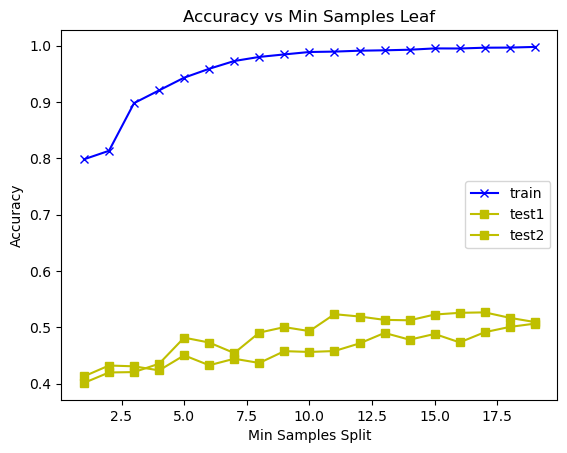

In [749]:
plt.plot(range(1,20), train_results_hist_depth, 'xb-', label='train')
plt.plot(range(1,20), test_results_hist_depth1, 'sy-', label='test1')
plt.plot(range(1,20), test_results_hist_depth2, 'sy-', label='test2')
plt.title('Accuracy vs Min Samples Leaf')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [750]:
#gradient boosting!
from sklearn.ensemble import GradientBoostingClassifier

gd_boost_clf = GradientBoostingClassifier(n_estimators=7, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)

print('GradientBoostingClassifier')
print('Score train: ', gd_boost_clf.score(X_train, Y_train))
print('Score test 1: ', gd_boost_clf.score(X_test1, Y_test1))
print('Score test 2: ', gd_boost_clf.score(X_test2, Y_test2))

GradientBoostingClassifier
Score train:  0.6408306522374964
Score test 1:  0.618421052631579
Score test 2:  0.6105263157894737


In [751]:
# try MLPClassifier and KNeighborsClassifier

# Actual Results

In [752]:
print(season_data_cleaned[2800][1])

17.0


Actual Table Results

In [33]:
actual_values_10 = {
            'Manchester United' : (1, 80),
            'Chelsea' : (2, 71),
            'Manchester City' : (3, 71),
            'Arsenal' : (4, 68),
            'Tottenham Hotspur' : (5, 62),
            'Liverpool' : (6, 58),
            'Everton' : (7, 54),
            'Fulham' : (8, 49),
            'Aston Villa' : (9, 48),
            'Sunderland' : (10, 47),
            'West Bromwich Albion' : (11, 47),
            'Newcastle United' : (12, 46),
            'Stoke City' : (13, 46),
            'Bolton Wanderers' : (14, 46),
            'Blackburn Rovers' : (15, 43),
            'Wigan Athletic' : (16, 42),
            'Wolverhampton Wanderers' : (17, 40),
            'Birmingham City' : (18, 39),
            'Blackpool' : (19, 39),
            'West Ham United' : (20, 33),
}
actual_values_11 = {
            'Manchester City' : (1, 89),
            'Manchester United' : (2, 89),
            'Arsenal' : (3, 70),
            'Tottenham Hotspur' : (4, 69),
            'Newcastle United' : (5, 65),
            'Chelsea' : (6, 64),
            'Everton' : (7, 56),
            'Liverpool' : (8, 52),
            'Fulham' : (9, 52),
            'West Bromwich Albion' : (10, 47),
            'Swansea City' : (11, 47),
            'Norwich City' : (12, 47),
            'Sunderland' : (13, 45),
            'Stoke City' : (14, 45),
            'Wigan Athletic' : (15, 43),
            'Aston Villa' : (16, 38),
            'Queens Park Rangers' : (17, 37),
            'Bolton Wanderers' : (18, 36),
            'Blackburn Rovers' : (19, 31),
            'Wolverhampton Wanderers' : (20, 25)
}
actual_values_12 = {
            'Manchester United' : (1, 89),
            'Manchester City' : (2, 78),
            'Chelsea' : (3, 75),
            'Arsenal' : (4, 73),
            'Tottenham Hotspur' : (5, 72),
            'Everton' : (6, 63),
            'Liverpool' : (7, 61),
            'West Bromwich Albion' : (8, 49),
            'Swansea City' : (9, 46),
            'West Ham United' : (10, 46),
            'Norwich City' : (11, 44),
            'Fulham' : (12, 43),
            'Stoke City' : (13, 42),
            'Southampton' : (14, 41),
            'Aston Villa' : (15, 41),
            'Newcastle United' : (16, 41),
            'Sunderland' : (17, 39),
            'Wigan Athletic' : (18, 36),
            'Reading' : (19, 28),
            'Queens Park Rangers' : (20, 25),
}
actual_values_13 = {
            'Manchester City' : (1, 86),
            'Liverpool' : (2, 84),
            'Chelsea' : (3, 82),
            'Arsenal' : (4, 79),
            'Everton' : (5, 72),
            'Tottenham Hotspur' : (6, 69),
            'Manchester United' : (7, 64),
            'Southampton' : (8, 56),
            'Stoke City' : (9, 50),
            'Newcastle United' : (10, 49),
            'Crystal Palace' : (11, 45),
            'Swansea City' : (12, 42),
            'West Ham United' : (13, 40),
            'Sunderland' : (14, 38),
            'Aston Villa' : (15, 38),
            'Hull City' : (16, 37),
            'West Bromwich Albion' : (17, 36),
            'Norwich City' : (18, 33),
            'Fulham' : (19, 32),
            'Cardiff City' : (20, 30),
}
actual_values_14 = {
            'Chelsea' : (1, 87),
            'Manchester City' : (2, 79),
            'Arsenal' : (3, 75),
            'Manchester United' : (4, 70),
            'Tottenham Hotspur' : (5, 64),
            'Liverpool' : (6, 62),
            'Southampton' : (7, 60),
            'Swansea City' : (8, 56),
            'Stoke City' : (9, 54),
            'Crystal Palace' : (10, 48),
            'Everton' : (11, 47),
            'West Ham United' : (12, 47),
            'West Bromwich Albion' : (13, 44),
            'Leicester City' : (14, 41),
            'Newcastle United' : (15, 39),
            'Sunderland' : (16, 38),
            'Aston Villa' : (17, 38),
            'Hull City' : (18, 35),
            'Burnley' : (19, 33),
            'Queens Park Rangers' : (20, 30),
}
actual_values_15 = {
            'Leicester City' : (1, 81),
            'Arsenal' : (2, 71),
            'Tottenham Hotspur' : (3, 70),
            'Manchester City' : (4, 66),
            'Manchester United' : (5, 66),
            'Southampton' : (6, 63),
            'West Ham United' : (7, 62),
            'Liverpool' : (8, 60),
            'Stoke City' : (9, 51),
            'Chelsea' : (10, 50),
            'Everton' : (11, 47),
            'Swansea City' : (12, 47),
            'Watford' : (13, 45),
            'West Bromwich Albion' : (14, 43),
            'Crystal Palace' : (15, 42),
            'AFC Bournemouth' : (16, 42),
            'Sunderland' : (17, 39),
            'Newcastle United' : (18, 37),
            'Norwich City' : (19, 34),
            'Aston Villa' : (20, 17),
}
actual_values_16 = {
            'Chelsea' : (1, 93),
            'Tottenham Hotspur' : (2, 86),
            'Manchester City' : (3, 78),
            'Liverpool' : (4, 76),
            'Arsenal' : (5, 75),
            'Manchester United' : (6, 69),
            'Everton' : (7, 61),
            'Southampton' : (8, 46),
            'AFC Bournemouth' : (9, 46),
            'West Bromwich Albion' : (10, 45),
            'West Ham United' : (11, 45),
            'Leicester City' : (12, 44),
            'Stoke City' : (13, 44),
            'Crystal Palace' : (14, 41),
            'Swansea City' : (15, 41),
            'Burnley' : (16, 40),
            'Watford' : (17, 40),
            'Hull City' : (18, 34),
            'Middlesbrough' : (19, 28),
            'Sunderland' : (20, 24),
}
actual_values_17 = {
            'Manchester City' : (1, 100),
            'Manchester United' : (2, 81),
            'Tottenham Hotspur' : (3, 77),
            'Liverpool' : (4, 75),
            'Chelsea' : (5, 70),
            'Arsenal' : (6, 63),
            'Burnley' : (7, 54),
            'Everton' : (8, 49),
            'Leicester City' : (9, 47),
            'Newcastle United' : (10, 44),
            'Crystal Palace' : (11, 44),
            'AFC Bournemouth' : (12, 44),
            'West Ham United' : (13, 42),
            'Watford' : (14, 41),
            'Brighton and Hove Albion' : (15, 40),
            'Huddersfield Town' : (16, 37),
            'Southampton' : (17, 36),
            'Swansea City' : (18, 33),
            'Stoke City' : (19, 33),
            'West Bromwich Albion' : (20, 31),
}
actual_values_18 = {
            'Manchester City' : (1, 98),
            'Liverpool' : (2, 97),
            'Chelsea' : (3, 72),
            'Tottenham Hotspur' : (4, 71),
            'Arsenal' : (5, 70),
            'Manchester United' : (6, 66),
            'Wolverhampton Wanderers' : (7, 57),
            'Everton' : (8, 54),
            'Leicester City' : (9, 52),
            'West Ham United' : (10, 52),
            'Watford' : (11, 50),
            'Crystal Palace' : (12, 49),
            'Newcastle United' : (13, 45),
            'AFC Bournemouth' : (14, 45),
            'Burnley' : (15, 40),
            'Southampton' : (16, 39),
            'Brighton and Hove Albion' : (17, 36),
            'Cardiff City' : (18, 34),
            'Fulham' : (19, 26),
            'Huddersfield Town': (20, 16)
}
actual_values_19 = {
            'Liverpool' : (1, 99),
            'Manchester City' : (2, 81),
            'Manchester United' : (3, 66),
            'Chelsea' : (4, 66),
            'Leicester City' : (5, 62),
            'Tottenham Hotspur' : (6, 59),
            'Wolverhampton Wanderers' : (7, 59),
            'Arsenal' : (8, 56),
            'Sheffield United' : (9, 54),
            'Burnley' : (10, 54),
            'Southampton' : (11, 52),
            'Everton' : (12, 49),
            'Newcastle United' : (13, 44),
            'Crystal Palace' : (14, 43),
            'Brighton and Hove Albion' : (15, 41),
            'West Ham United' : (16, 39),
            'Aston Villa' : (17, 35),
            'AFC Bournemouth' : (18, 34),
            'Watford' : (19, 34),
            'Norwich City' : (20, 21),
}
actual_values_20 = {
            'Manchester City' : (1, 86),
            'Manchester United' : (2, 74),
            'Liverpool' : (3, 69),
            'Chelsea' : (4, 67),
            'Leicester City' : (5, 66),
            'West Ham United' : (6, 65),
            'Tottenham Hotspur' : (7, 62),
            'Arsenal' : (8, 61),
            'Leeds United' : (9, 59),
            'Everton' : (10, 59),
            'Aston Villa' : (11, 55),
            'Newcastle United' : (12, 45),
            'Wolverhampton Wanderers' : (13, 45),
            'Crystal Palace' : (14, 44),
            'Southampton' : (15, 43),
            'Brighton and Hove Albion' : (16, 41),
            'Burnley' : (17, 39),
            'Fulham' : (18, 28),
            'West Bromwich Albion' : (19, 26),
            'Sheffield United' : (20, 23),
}

In [34]:
season_results_actual = [actual_values_10, actual_values_11, actual_values_12, actual_values_13, actual_values_14, actual_values_15, actual_values_16, actual_values_17, actual_values_18, actual_values_19, actual_values_20]

# Function

In [60]:
def predict_season(season_num, model, actual_data):

    #choose the model given by user
    if model == 'logReg':
        clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=1000, solver = 'newton-cg').fit(X_train, Y_train)
    elif model == 'SVC1':
        clf = svm.SVC(gamma='scale', degree=1, random_state=0, kernel='poly').fit(X_train, Y_train)
    elif model == 'SVC2':
        clf = svm.SVC(gamma='scale', degree=2, random_state=0, kernel='poly').fit(X_train, Y_train)
    elif model == 'SVC3':
        clf = svm.SVC(gamma='scale', degree=3, random_state=0, kernel='poly').fit(X_train, Y_train)
    elif model == 'SVC4':
        clf = svm.SVC(gamma='scale', degree=4, random_state=0, kernel='poly').fit(X_train, Y_train)
    
    else:
        return 'No model found. Please Enter a valid model.'
    

    ct = 0
    #get the season data
    if season_num == 20:
        X_test_unscaled = np.zeros((271, 102))
        Y_test = np.zeros((271,))
    elif 9 < season_num < 20:
        X_test_unscaled = np.zeros((380, 102))
        Y_test = np.zeros((380,))
    else:
        return 'We do not have data for that season. Please enter a number between 10 and 20.'
    
    
    for it in range(0, len(season_data_cleaned)):
        if season_data_cleaned[it][1] == season_num:
            X_test_unscaled[ct] = season_data_cleaned[it]
            Y_test[ct] = match_target_scores[it][1]
            ct = ct + 1
    
    scaler = StandardScaler().fit(seasons_train)
    X_test = scaler.transform(X_test_unscaled)


    print('Classifier: ', model)
    print('Score train: ', clf.score(X_train, Y_train))
    print('Score test: ', clf.score(X_test, Y_test))
    print('\n')
    print('__________________________________________________________________________________________________')
    #create the data predictions
    predictions = clf.predict(X_test)

    #create the season table
    standing = 0
    standing = {}
    indexofteams = []
    for i in range(len(season_csv_to_array)):
        season_number = (int)(season_csv_to_array[i][2][0] + season_csv_to_array[i][2][1])
        if season_number == season_num:
            indexofteams.append(i)
            if (season_csv_to_array[i][4]) in standing:
                standing[season_csv_to_array[i][4]] = 0
            else:
                standing[season_csv_to_array[i][4]] = 0

    if season_num < 20:
        place = season_num % 10
    else:
        place = 10
    
    starting_spots = [0, 380, 760, 1140, 1520, 1900, 2279, 2659, 3039, 3419, 3799]

    i = starting_spots[place]
    for ind in range(len(predictions)):
        if predictions[ind] == 1:
            standing[season_csv_to_array[i][4]] += 3
        elif predictions[ind] == 0:
            standing[season_csv_to_array[i][4]] += 1
            standing[season_csv_to_array[i][5]] += 1
        else:
            standing[season_csv_to_array[i][5]] += 3
        i=i+1
    
    actual_values = actual_data[place]

    sorted_dict = dict(sorted(standing.items(), key=lambda x: x[1], reverse=True))
    
    #find the top 4 and bottom 3
    max_len_key = max(len(k) for k in sorted_dict.keys())  # get the maximum length of keys
    max_len_value = max(len(str(v)) for v in sorted_dict.values())  # get the maximum length of values
    place = 1

    champions_leage_pred = []
    champions_league_real = ['temp','temp','temp','temp']
    relegation_pred = []
    relegation_real = ['temp','temp','temp']
    top_four_error = 0
    relegation_error = 0

    print('20' + str(season_num) + '-20' + str(season_num + 1) + ' Premier League Season')
    print('Model Used: ', model)
    print('')
    print('# \t Team \t\t\t\t Points (pred)\tPoints (real)\tPoints Diff\tPlace Diff')
    print('__________________________________________________________________________________________________')
    for key, value in sorted_dict.items():
        # print(key)
        # print(value)
        if place < 10:
            print(place, ' :\t', "{:{key_width}}  {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values[key][1], value - actual_values[key][1], actual_values[key][0] - place, key_width=max_len_key, value_width=max_len_value))
        else:
            print(place, ':\t', "{:{key_width}}  {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values[key][1], value - actual_values[key][1], actual_values[key][0] - place, key_width=max_len_key, value_width=max_len_value))
        
        if actual_values[key][0] < 5:
            champions_league_real[actual_values[key][0]-1] = key
        if actual_values[key][0] > 17:
            relegation_real[actual_values[key][0]-18] = key
        
        if place < 5:
            champions_leage_pred.append(key)
            top_four_error = top_four_error + np.abs(actual_values[key][0] - place)
        if place > 17:
            relegation_pred.append(key)
            relegation_error = relegation_error + np.abs(actual_values[key][0] - place)
        
        place = place + 1

    champ_correct = 0
    rel_correct = 0
    for it in champions_leage_pred:
        if it in champions_league_real:
            champ_correct = champ_correct + 1

    for it in relegation_pred:
        if it in relegation_real:
            rel_correct = rel_correct + 1
        

    print('\n')
    print('_________________________________________________')
    print('20' + str(season_num) + '-20' + str(season_num + 1) + ' Premier League Season')
    print('Champion League Qualification')
    print('Predicted Teams \t\t Actual Teams')
    print('_________________________________________________')
    for it in range(0, len(champions_leage_pred)):
        print("{:{key_width}}\t{:{key_width}}".format(champions_leage_pred[it], champions_league_real[it], key_width=max_len_key))
    print('\n')
    print('Relegation Battle')
    print('Predicted Teams \t\t Actual Teams')
    print('_________________________________________________')
    for it in range(len(relegation_pred)):
        print("{:{key_width}}\t{:{key_width}}".format(relegation_pred[it], relegation_real[it], key_width=max_len_key))
    #print error metrics
    print('\n')
    print('_________________________________________________')
    print('Place error in top 4 prediction: ', top_four_error)
    print('Place error in relegation prediction: ', relegation_error)

    print('\n')
    print('_________________________________________________')
    print('Correct top 4 teams: ', champ_correct)
    print('Correct relegated teams: ', rel_correct)
    

    if season_num in [18, 19]:
        # probs = clf.predict_proba(X_test)
        # probs_hist = np.zeros((len(probs)))
        # for it in range(0, len(probs)):
        #     probs_hist[it] = max([probs[it][0], probs[it][1], probs[it][2]])
        # print(probs_hist)
        plt.hist(Y_test, bins = 3, rwidth=0.5, label='true values', alpha=0.4)
        plt.hist(predictions, bins = 3, rwidth=0.5, label='predicted values', alpha=0.4)
        # plt.hist(probs_hist, bins = 25, rwidth=0.5, label='probabilities', alpha=0.4)
        
        
        plt.title('20' + str(season_num) + '-20' + str(season_num + 1) + ' Prediction Distribution Histogram for ' + model + ' model.')
        plt.xlabel('Predicted Label')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        # plt.legend()
        

    return top_four_error, relegation_error, champ_correct, rel_correct


In [36]:
print(max([prob1[0][0], prob1[0][1], prob1[0][2]]))
print(prob1[0])

0.8517329802034965
[0.06842199 0.07984503 0.85173298]


In [37]:
# top_error, rel_error, top_correct, rel_correct = predict_season(18, 'logReg', season_results_actual)

# Logistic Regression

##################################################
Classifier:  logReg
Score train:  0.689090377303305
Score test:  0.6842105263157895


__________________________________________________________________________________________________
2010-2011 Premier League Season
Model Used:  logReg

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester United        83 		 80		  3		  0
2  :	 Chelsea                  83 		 71		 12		  0
3  :	 Arsenal                  74 		 68		  6		  1
4  :	 Manchester City          73 		 71		  2		 -1
5  :	 Tottenham Hotspur        69 		 62		  7		  0
6  :	 Bolton Wanderers         58 		 46		 12		  8
7  :	 Liverpool                57 		 58		 -1		 -1
8  :	 Fulham                   55 		 49		  6		  0
9  :	 Blackburn Rovers         53 		 43		 10		  6
10 :	 West Bromwich Albion     51 		 47		  4		  1
11 :	 Blackpool                49 		 39		 10		 

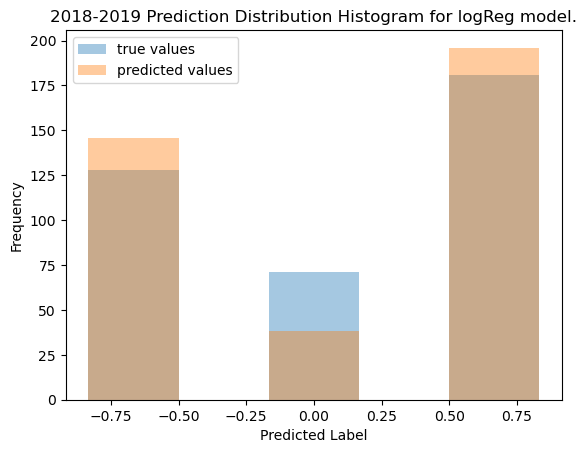

##################################################
Classifier:  logReg
Score train:  0.689090377303305
Score test:  0.6368421052631579


__________________________________________________________________________________________________
2019-2020 Premier League Season
Model Used:  logReg

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester United         99 		 66		 33		  2
2  :	 Manchester City           90 		 81		  9		  0
3  :	 Liverpool                 82 		 99		 -17		 -2
4  :	 Chelsea                   76 		 66		 10		  0
5  :	 Leicester City            69 		 62		  7		  0
6  :	 Everton                   61 		 49		 12		  6
7  :	 Tottenham Hotspur         60 		 59		  1		 -1
8  :	 Wolverhampton Wanderers   57 		 59		 -2		 -1
9  :	 Brighton and Hove Albion  55 		 41		 14		  6
10 :	 West Ham United           51 		 39		 12		  6
11 :	 Aston Villa               50 	

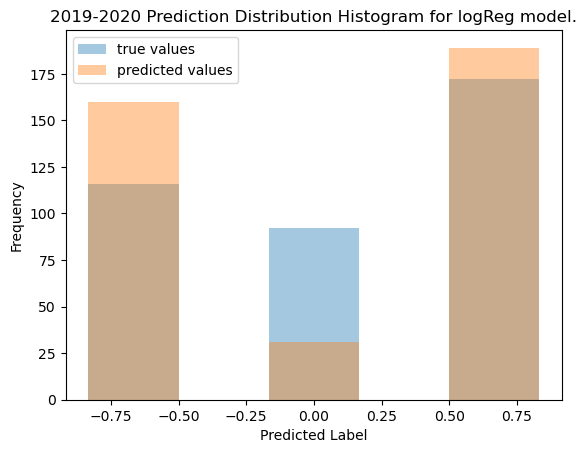

##################################################
Classifier:  logReg
Score train:  0.689090377303305
Score test:  0.7343173431734318


__________________________________________________________________________________________________
2020-2021 Premier League Season
Model Used:  logReg

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester City           72 		 86		 -14		  0
2  :	 Leicester City            63 		 66		 -3		  3
3  :	 Manchester United         54 		 74		 -20		 -1
4  :	 Chelsea                   52 		 67		 -15		  0
5  :	 Everton                   51 		 59		 -8		  5
6  :	 Tottenham Hotspur         45 		 62		 -17		  1
7  :	 West Ham United           43 		 65		 -22		 -1
8  :	 Wolverhampton Wanderers   42 		 45		 -3		  5
9  :	 Aston Villa               42 		 55		 -13		  2
10 :	 Liverpool                 42 		 69		 -27		 -7
11 :	 Southampton             

In [49]:
top_error_avg = []
rel_error_avg = []
top_correct_avg = []
rel_correct_avg = []
for it in range(10,21):
    print('##################################################')
    top_error, rel_error, top_correct, rel_correct = predict_season(it, 'logReg', season_results_actual)
    
    top_error_avg.append(top_error)
    rel_error_avg.append(rel_error)
    top_correct_avg.append(top_correct)
    rel_correct_avg.append(rel_correct)
#options are 10-20, [logReg, SVC1, SVC2]

In [51]:
print('Logistic Regression')
print('Average top 4 position error sum: ', sum(top_error_avg)/len(top_error_avg))
print('Average relegation position error sum: ', sum(rel_error_avg)/len(rel_error_avg))
print('Average top 4 position correct: ', sum(top_correct_avg)/len(top_correct_avg))
print('Average relegation position correct: ', sum(rel_correct_avg)/len(rel_correct_avg))

Logistic Regression
Average top 4 position error sum:  4.454545454545454
Average relegation position error sum:  5.7272727272727275
Average top 4 position correct:  3.3636363636363638
Average relegation position correct:  1.9090909090909092


# SVC degree 1

##################################################
Classifier:  SVC1
Score train:  0.6820707809300965
Score test:  0.6447368421052632


__________________________________________________________________________________________________
2010-2011 Premier League Season
Model Used:  SVC1

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Chelsea                  83 		 71		 12		  1
2  :	 Arsenal                  82 		 68		 14		  2
3  :	 Manchester United        81 		 80		  1		 -2
4  :	 Manchester City          75 		 71		  4		 -1
5  :	 Tottenham Hotspur        73 		 62		 11		  0
6  :	 Liverpool                60 		 58		  2		  0
7  :	 Bolton Wanderers         55 		 46		  9		  7
8  :	 West Bromwich Albion     55 		 47		  8		  3
9  :	 Everton                  55 		 54		  1		 -2
10 :	 Wigan Athletic           55 		 42		 13		  6
11 :	 Blackpool                54 		 39		 15		  8


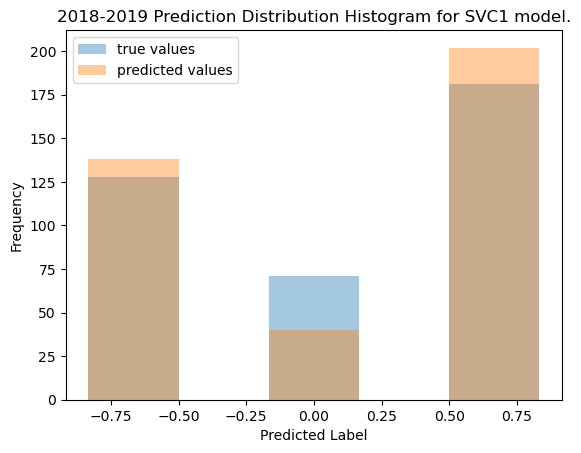

##################################################
Classifier:  SVC1
Score train:  0.6820707809300965
Score test:  0.6342105263157894


__________________________________________________________________________________________________
2019-2020 Premier League Season
Model Used:  SVC1

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester United         89 		 66		 23		  2
2  :	 Liverpool                 86 		 99		 -13		 -1
3  :	 Manchester City           85 		 81		  4		 -1
4  :	 Leicester City            73 		 62		 11		  1
5  :	 Chelsea                   69 		 66		  3		 -1
6  :	 Everton                   66 		 49		 17		  6
7  :	 West Ham United           62 		 39		 23		  9
8  :	 Wolverhampton Wanderers   59 		 59		  0		 -1
9  :	 Tottenham Hotspur         55 		 59		 -4		 -3
10 :	 Brighton and Hove Albion  53 		 41		 12		  5
11 :	 Burnley                   49 		 5

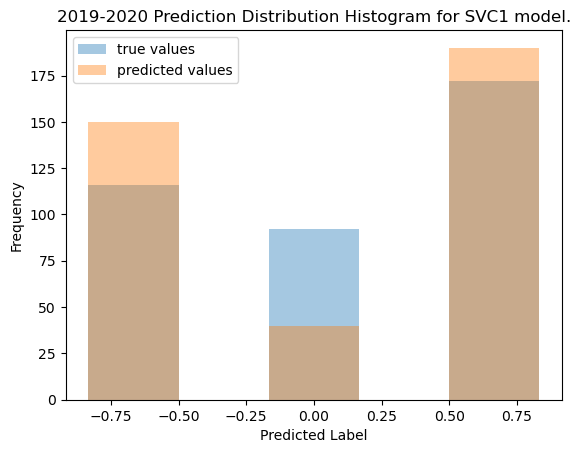

##################################################
Classifier:  SVC1
Score train:  0.6820707809300965
Score test:  0.7121771217712177


__________________________________________________________________________________________________
2020-2021 Premier League Season
Model Used:  SVC1

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester City           67 		 86		 -19		  0
2  :	 Leicester City            61 		 66		 -5		  3
3  :	 Everton                   58 		 59		 -1		  7
4  :	 Manchester United         54 		 74		 -20		 -2
5  :	 Tottenham Hotspur         53 		 62		 -9		  2
6  :	 Chelsea                   51 		 67		 -16		 -2
7  :	 West Ham United           43 		 65		 -22		 -1
8  :	 Arsenal                   39 		 61		 -22		  0
9  :	 Leeds United              38 		 59		 -21		  0
10 :	 Aston Villa               37 		 55		 -18		  1
11 :	 Liverpool                 3

In [52]:
top_error_avg = []
rel_error_avg = []
top_correct_avg = []
rel_correct_avg = []
for it in range(10,21):
    print('##################################################')
    top_error, rel_error, top_correct, rel_correct = predict_season(it, 'SVC1', season_results_actual)
    
    top_error_avg.append(top_error)
    rel_error_avg.append(rel_error)
    top_correct_avg.append(top_correct)
    rel_correct_avg.append(rel_correct)
#options are 10-20, [logReg, SVC1, SVC2]

In [53]:
print('SVC degree 1')
print('Average top 4 position error sum: ', sum(top_error_avg)/len(top_error_avg))
print('Average relegation position error sum: ', sum(rel_error_avg)/len(rel_error_avg))
print('Average top 4 position error: ', sum(top_correct_avg)/len(top_correct_avg))
print('Average relegation position error: ', sum(rel_correct_avg)/len(rel_correct_avg))

SVC degree 1
Average top 4 position error sum:  5.2727272727272725
Average relegation position error sum:  7.7272727272727275
Average top 4 position error:  3.272727272727273
Average relegation position error:  1.6363636363636365


# SVC degree 2

##################################################
Classifier:  SVC2
Score train:  0.6469727990640538
Score test:  0.65


__________________________________________________________________________________________________
2010-2011 Premier League Season
Model Used:  SVC2

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Arsenal                  86 		 68		 18		  3
2  :	 Manchester United        77 		 80		 -3		 -1
3  :	 Chelsea                  76 		 71		  5		 -1
4  :	 Manchester City          72 		 71		  1		 -1
5  :	 Blackburn Rovers         63 		 43		 20		 10
6  :	 Liverpool                62 		 58		  4		  0
7  :	 Tottenham Hotspur        62 		 62		  0		 -2
8  :	 Aston Villa              56 		 48		  8		  1
9  :	 Fulham                   55 		 49		  6		 -1
10 :	 Bolton Wanderers         55 		 46		  9		  4
11 :	 Sunderland               53 		 47		  6		 -1
12 :	 Everton 

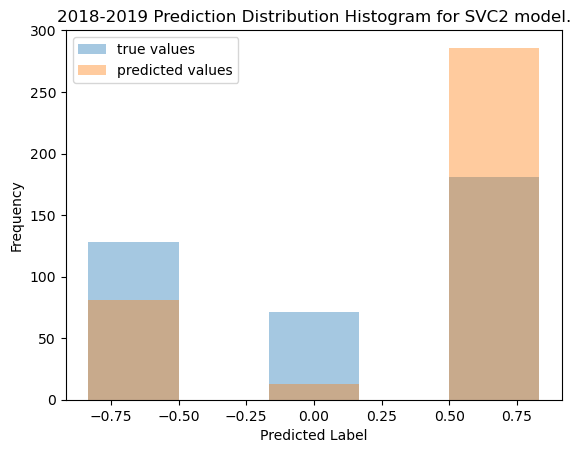

##################################################
Classifier:  SVC2
Score train:  0.6469727990640538
Score test:  0.5342105263157895


__________________________________________________________________________________________________
2019-2020 Premier League Season
Model Used:  SVC2

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Liverpool                 107 		  99		   8		   0
2  :	 Manchester City           100 		  81		  19		   0
3  :	 Chelsea                    89 		  66		  23		   1
4  :	 Leicester City             79 		  62		  17		   1
5  :	 Manchester United          75 		  66		   9		  -2
6  :	 Tottenham Hotspur          65 		  59		   6		   0
7  :	 Everton                    52 		  49		   3		   5
8  :	 Southampton                49 		  52		  -3		   3
9  :	 Sheffield United           48 		  54		  -6		   0
10 :	 Wolverhampton Wanderers    46 		  59		 -13		  -3


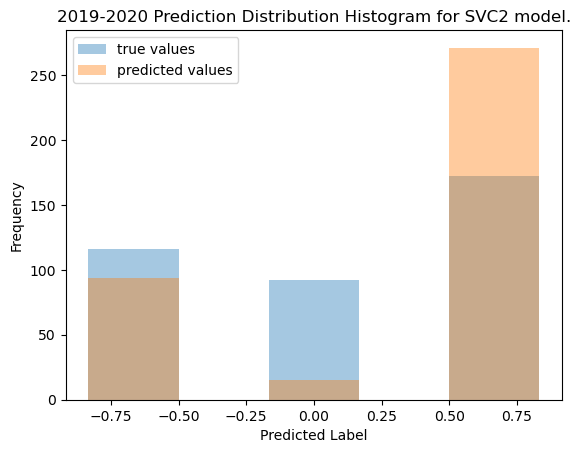

##################################################
Classifier:  SVC2
Score train:  0.6469727990640538
Score test:  0.6568265682656826


__________________________________________________________________________________________________
2020-2021 Premier League Season
Model Used:  SVC2

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Leicester City            67 		 66		  1		  4
2  :	 Manchester City           67 		 86		 -19		 -1
3  :	 Manchester United         62 		 74		 -12		 -1
4  :	 Liverpool                 58 		 69		 -11		 -1
5  :	 Chelsea                   49 		 67		 -18		 -1
6  :	 Everton                   47 		 59		 -12		  4
7  :	 Tottenham Hotspur         47 		 62		 -15		  0
8  :	 Arsenal                   42 		 61		 -19		  0
9  :	 Aston Villa               41 		 55		 -14		  2
10 :	 Leeds United              40 		 59		 -19		 -1
11 :	 West Ham United          

In [63]:
top_error_avg = []
rel_error_avg = []
top_correct_avg = []
rel_correct_avg = []
for it in range(10,21):
    print('##################################################')
    top_error, rel_error, top_correct, rel_correct = predict_season(it, 'SVC2', season_results_actual)
    
    top_error_avg.append(top_error)
    rel_error_avg.append(rel_error)
    top_correct_avg.append(top_correct)
    rel_correct_avg.append(rel_correct)

In [64]:
print('SVC degree 2')
print('Average top 4 position error sum: ', sum(top_error_avg)/len(top_error_avg))
print('Average relegation position error sum: ', sum(rel_error_avg)/len(rel_error_avg))
print('Average top 4 position correct: ', sum(top_correct_avg)/len(top_correct_avg))
print('Average relegation position correct: ', sum(rel_correct_avg)/len(rel_correct_avg))

SVC degree 2
Average top 4 position error sum:  4.090909090909091
Average relegation position error sum:  7.2727272727272725
Average top 4 position correct:  3.3636363636363638
Average relegation position correct:  1.9090909090909092
